In [1]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
DATA_PATH = os.path.join('data')

In [3]:
def load_training_data(training_path=DATA_PATH):
    cvs_path = os.path.join(training_path, 'train.csv')
    return pd.read_csv(cvs_path)

In [4]:
training = load_training_data()

# The big picture
- frame the problem: supervised regression task
- performance measure: RMSE

In [476]:
training.shape

(1460, 81)

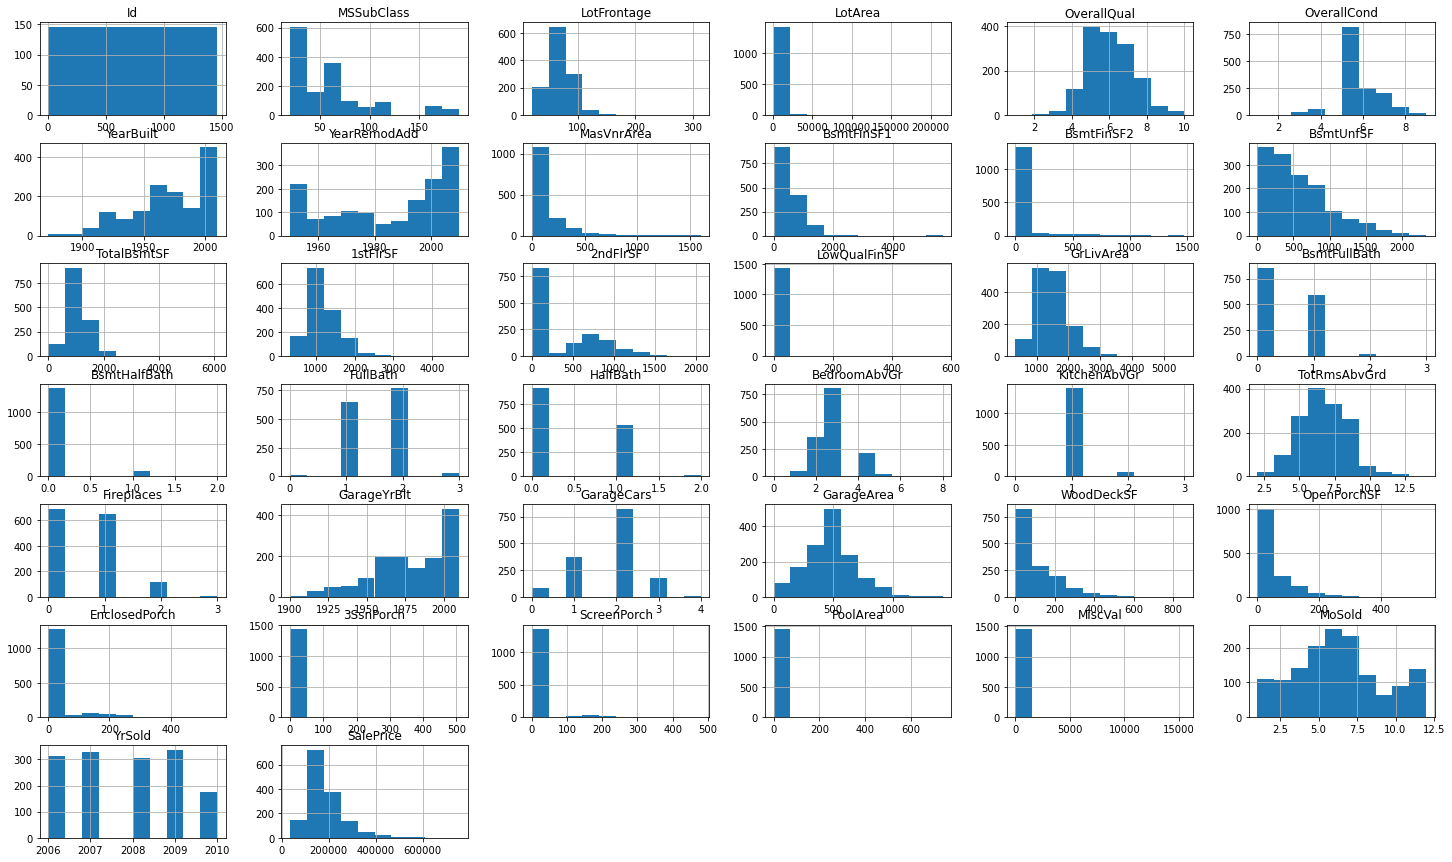

In [477]:
training.hist(figsize=(25,15))
plt.show()

In [5]:
train_set, test_set = train_test_split(training, test_size=0.3, random_state=42)

In [6]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000


In [6]:
EDA = train_set.copy()

In [7]:
corr_matrix = EDA.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

In [45]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.784720
GrLivArea        0.689238
GarageCars       0.642689
GarageArea       0.621937
TotalBsmtSF      0.590017
1stFlrSF         0.583132
FullBath         0.549164
TotRmsAbvGrd     0.519634
YearBuilt        0.512206
YearRemodAdd     0.512190
GarageYrBlt      0.474363
Fireplaces       0.461329
MasVnrArea       0.454514
BsmtFinSF1       0.360559
LotFrontage      0.340251
WoodDeckSF       0.331151
2ndFlrSF         0.314904
HalfBath         0.278889
OpenPorchSF      0.277547
LotArea          0.262896
BsmtFullBath     0.228331
BsmtUnfSF        0.223321
BedroomAbvGr     0.159879
PoolArea         0.138324
ScreenPorch      0.119974
3SsnPorch        0.059417
MoSold           0.048494
LowQualFinSF    -0.002201
BsmtFinSF2      -0.009665
YrSold          -0.012761
MiscVal         -0.016525
Id              -0.034812
BsmtHalfBath    -0.052806
OverallCond     -0.071461
MSSubClass      -0.094099
KitchenAbvGr    -0.146972
EnclosedPorch   -0.147502
Name: SalePr

In [8]:
from pandas.plotting import scatter_matrix

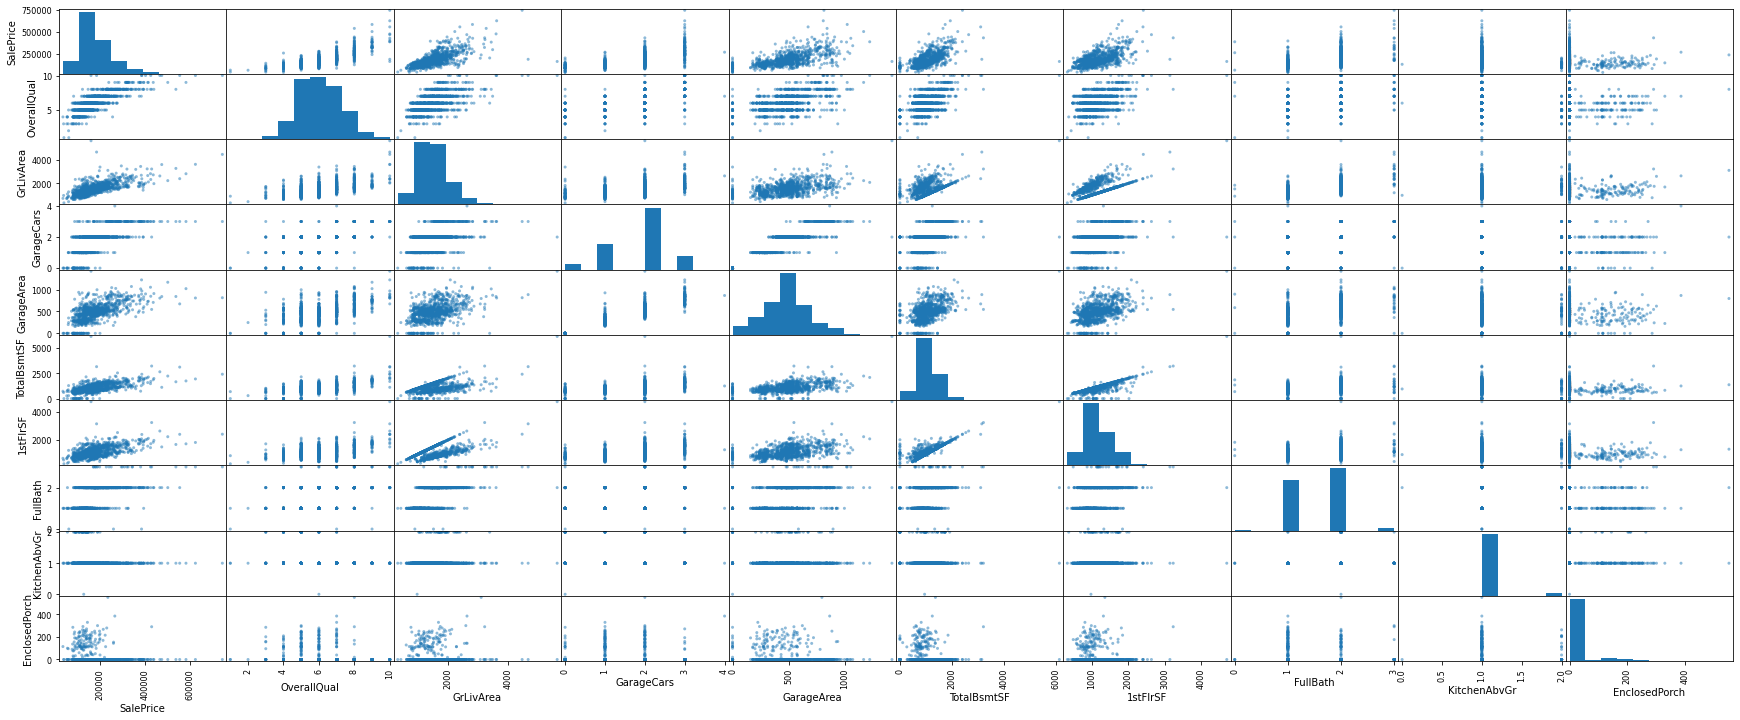

In [54]:
attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
              'TotalBsmtSF', '1stFlrSF', 'FullBath', 'KitchenAbvGr', 'EnclosedPorch']
scatter_matrix(EDA[attributes], figsize = (30,12));

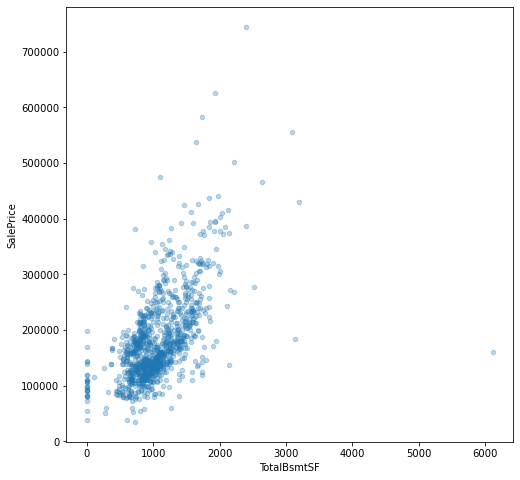

In [58]:
EDA.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', alpha=0.3, figsize=(8,8));

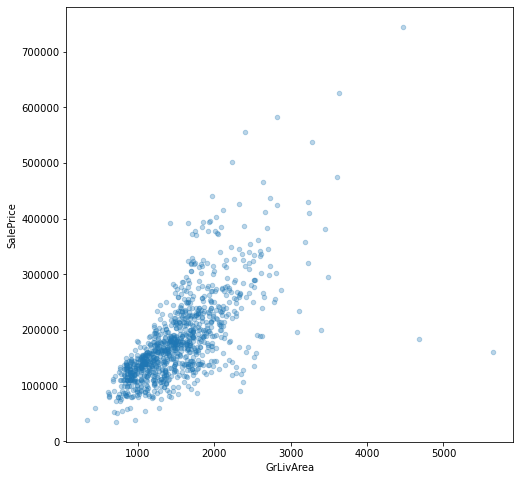

In [59]:
EDA.plot(kind='scatter', x='GrLivArea', y='SalePrice', alpha=0.3, figsize=(8,8));

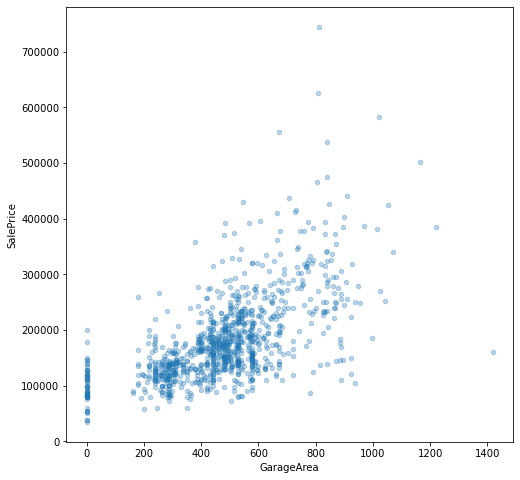

In [131]:
EDA.plot(kind='scatter', x='GarageArea', y='SalePrice', alpha=0.3, figsize=(8,8));

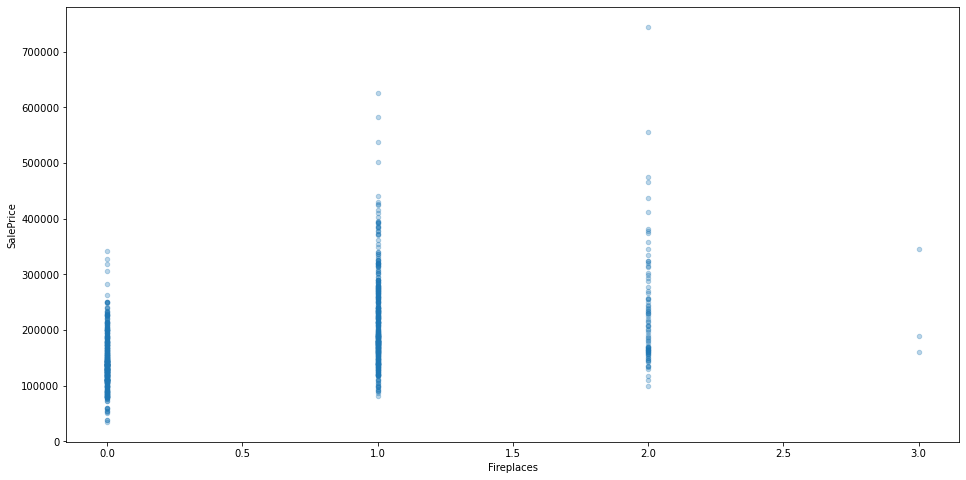

In [169]:
EDA.plot(kind='scatter', x='Fireplaces', y='SalePrice', alpha=0.3, figsize=(16,8));

In [452]:
missing_vals = testdf.isnull().sum().sort_values(ascending = False)
percent = ( testdf.isnull().sum()/testdf.isnull().count() ).sort_values(ascending = False)
missing_df = pd.concat([missing_vals, percent], axis = 1, keys = ["Total", "Percent"])
total_missing = missing_df[missing_df['Total'] > 0]
total_missing

,Total,Percent


# Prepare data for ML algorithms

In [455]:
#train_set, test_set

In [442]:
#housing = train_set.drop('SalePrice', axis=1)
#housing = train_set.copy()
housing_labels = train_set['SalePrice'].copy()

In [6]:
def EDA_df(df):
    lotcon = {'CulDSac': 0, 'Inside': 1, 'Corner': 2, 'FR2': 2, 'FR3': 3}
    df.LotConfig = [lotcon[item] for item in df.LotConfig]
    
    bdtype = {'1Fam': 0, 'Duplex': 1, 'TwnhsE': 1, '2fmCon': 2, 'Twnhs': 3}
    df.BldgType = [bdtype[item] for item in df.BldgType]
    
    Roof = {'Gable': 1,'Flat': 0, 'Gambrel': 0, 'Hip': 0, 'Mansard': 0, 'Shed': 0}
    df.RoofStyle = [Roof[item] for item in df.RoofStyle]
    
    df.LotFrontage.fillna(0, inplace=True)
    df.MasVnrArea.fillna(0, inplace=True)
    df.MasVnrType.fillna('None', inplace=True)
    
    Masonry = {'None': 0, 'BrkFace': 1, 'Stone': 1, 'BrkCmn': 1} 
    df.MasVnrType = [Masonry[item] for item in df.MasVnrType]
    
    df.Fence.fillna('None', inplace=True)
    fencing = {'None': 0, 'MnPrv': 1, 'GdPrv': 1, 'GdWo': 1, 'MnWw': 1} 
    df.Fence = [fencing[item] for item in df.Fence]
    
    AC = {'Y': 1, 'N': 0} 
    df.CentralAir = [AC[item] for item in df.CentralAir]
    
    df.Alley.fillna('None', inplace=True)
    Ay = {'None': 0, 'Grvl': 1, 'Pave': 1} 
    df.Alley = [Ay[item] for item in df.Alley]
    
    land = {'Lvl': 1, 'Bnk': 0, 'HLS': 0, 'Low': 0} 
    df.LandContour = [land[item] for item in df.LandContour]
    
    fd = {'PConc': 1, 'CBlock': 0, 'BrkTil': 0, 'Slab': 0, 'Stone': 0, 'Wood': 0} 
    df.Foundation = [fd[item] for item in df.Foundation]
    
    df.Fireplaces = df.Fireplaces.mask(df.Fireplaces>0,1)
    
    lot = {'Reg': 1, 'IR1': 0, 'IR2': 0, 'IR3': 0} 
    df.LotShape = [lot[item] for item in df.LotShape]
    
    drive = {'Y': 1, 'N': 0, 'P': 0} 
    df.PavedDrive = [drive[item] for item in df.PavedDrive]
    
    rank = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, 'None': 0} 
    df.GarageCond.fillna('None', inplace=True)
    df.GarageCond = [rank[item] for item in df.GarageCond]
    
    df.GarageQual.fillna('None', inplace=True)
    df.GarageQual = [rank[item] for item in df.GarageQual]
    
    df.FireplaceQu.fillna('None', inplace=True)
    df.FireplaceQu = [rank[item] for item in df.FireplaceQu]
    
    condition = {'RRNe': 0, 'RRNn': 0, 'RRAe': 0, 'RRAn': 0,
            'Artery': 1, 'Feedr': 1, 'Norm': 2, 'PosN': 2, 'PosA': 2} 
    #0, railroad; 1, high traffic; 2, low traffic
    df.Condition1 = [condition[item] for item in df.Condition1]
    
    df.BsmtQual.fillna('None', inplace=True)
    df.BsmtQual = [rank[item] for item in df.BsmtQual]
    
    df.BsmtCond.fillna('None', inplace=True)
    df.BsmtCond = [rank[item] for item in df.BsmtCond]
    
    df.ExterQual = [rank[item] for item in df.ExterQual]
    df.KitchenQual = [rank[item] for item in df.KitchenQual]
    
    rank2 = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4} 
    df.HeatingQC = [rank2[item] for item in df.HeatingQC]
    df.ExterCond = [rank2[item] for item in df.ExterCond]
    
    df.BsmtExposure.fillna('None', inplace=True)
    bsmtExp = {'None': 0, 'No': 1, 'Mn': 1, 'Av': 2, 'Gd': 3} 
    df.BsmtExposure = [bsmtExp[item] for item in df.BsmtExposure]
    neighbor = {'Blmngtn': 0, 'Blueste': 0, 'BrDale': 0, 'BrkSide': 3, 'ClearCr': 0,
           'CollgCr': 2, 'Crawfor': 2, 'Edwards': 1, 'Gilbert': 0, 'IDOTRR': 3,
           'MeadowV': 2, 'Mitchel': 2, 'NAmes': 0, 'NoRidge': 0, 'NPkVill': 0, 
            'NridgHt': 0, 'NWAmes': 0, 'OldTown': 3, 'SWISU': 2, 'Sawyer': 1,
            'SawyerW': 1, 'Somerst': 0, 'StoneBr': 0, 'Timber': 2, 'Veenker': 0
           } 
    df.Neighborhood = [neighbor[item] for item in df.Neighborhood]
    df.GarageType.fillna('None', inplace=True)
    gartype = {'None': 0, '2Types': 1, 'CarPort': 1, 'Basment': 1,
            'BuiltIn': 1, 'Detchd': 2, 'Attchd': 3} 
    df.GarageType = [gartype[item] for item in df.GarageType]
    
    df.OverallQual = df.OverallQual.mask(df.OverallQual<=2,0)
    df.OverallQual = df.OverallQual.mask((df.OverallQual>2) & (df.OverallQual<=4),1)
    df.OverallQual = df.OverallQual.mask((df.OverallQual>4) & (df.OverallQual<=6),2)
    df.OverallQual = df.OverallQual.mask((df.OverallQual>6) & (df.OverallQual<=8),3)
    df.OverallQual = df.OverallQual.mask(df.OverallQual>=9,4)
    
    df.OverallCond = df.OverallCond.mask(df.OverallCond<=2,0)
    df.OverallCond = df.OverallCond.mask((df.OverallCond>2) & (df.OverallCond<=4),1)
    df.OverallCond = df.OverallCond.mask((df.OverallCond>4) & (df.OverallCond<=6),2)
    df.OverallCond = df.OverallCond.mask((df.OverallCond>6) & (df.OverallCond<=8),3)
    df.OverallCond = df.OverallCond.mask(df.OverallCond>=9,4)
    
    ## new features
    df['HouseAge'] = df.YrSold - df.YearBuilt
    df['GarageAge'] = df.YrSold - df.GarageYrBlt
    df['RecentRemodel'] = df.YrSold - df.YearRemodAdd
    df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df['3SsnPorch']
    df['TotalBathAbGr'] = df.FullBath + df.HalfBath / 2
    df['TotalFinSF'] = df.BsmtFinSF1 + df.BsmtFinSF2 + df['1stFlrSF'] + df['2ndFlrSF']
    df['BsmtBath'] = df.BsmtFullBath + df.BsmtHalfBath
    df.BsmtBath = df.BsmtBath.mask(df.BsmtBath>0,1)
    
    drop_attribs = ['Utilities', 'Heating', 'RoofMatl', 'SaleCondition', 'Electrical', 'SaleType',
                'PoolQC', 'MiscFeature', 'Street', 'Functional', 'MSSubClass', 'LandSlope', 
                'HouseStyle', 'YearBuilt', 'GarageYrBlt', 'MoSold', 'MiscVal', 'FullBath', 
                'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'LowQualFinSF', 'PoolArea', 'YrSold',
                'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'GarageCars', 'KitchenAbvGr',
                'BedroomAbvGr', 'Exterior1st', 'Exterior2nd', 'Condition2', 'BsmtFinType1', 'BsmtFinType2',
               'GarageFinish', 'MSZoning']
    df = df.drop(drop_attribs, axis=1)
    df = df.drop(['OverallCond', 'ExterCond', 'LandContour', 'GarageAge'], axis=1)
    
    return df

In [7]:
train_cleaned = EDA_df(train_set)

In [8]:
train_cleaned.shape

(1022, 40)

In [9]:
test_cleaned = EDA_df(test_set)

In [10]:
test_cleaned.shape

(438, 40)

In [11]:
train_cleaned.head()

,Id,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,OverallQual,...,PavedDrive,WoodDeckSF,Fence,SalePrice,HouseAge,RecentRemodel,TotalPorchSF,TotalBathAbGr,TotalFinSF,BsmtBath
135,136,80.0,10400,0,1,1,0,2,0,3,...,1,98,1,174000,38,38,0,2.0,1682,0
1452,1453,35.0,3675,0,1,1,1,2,1,2,...,1,0,0,145000,1,1,28,1.0,1619,1
762,763,72.0,8640,0,1,1,0,2,0,3,...,1,169,0,215200,1,1,45,2.5,1571,0
932,933,84.0,11670,0,0,2,0,0,0,4,...,1,0,0,320000,1,1,191,2.0,1905,0
435,436,43.0,10667,0,0,0,2,2,0,3,...,1,158,0,212000,13,13,61,2.5,2390,1


In [433]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.733066
GrLivArea        0.689238
TotalFinSF       0.678082
ExterQual        0.658612
KitchenQual      0.655688
GarageArea       0.621937
BsmtQual         0.619358
TotalBsmtSF      0.590017
TotalBathAbGr    0.584861
FireplaceQu      0.524848
TotRmsAbvGrd     0.519634
Foundation       0.481575
Fireplaces       0.476331
MasVnrArea       0.453250
HeatingQC        0.440328
BsmtExposure     0.355017
MasVnrType       0.345093
WoodDeckSF       0.331151
GarageQual       0.281610
CentralAir       0.269116
GarageType       0.268161
GarageCond       0.266425
LotArea          0.262896
BsmtCond         0.225136
PavedDrive       0.223190
LotFrontage      0.205541
BsmtBath         0.192954
TotalPorchSF     0.172693
Condition1       0.117960
Id              -0.034812
Alley           -0.134945
Fence           -0.156784
RoofStyle       -0.224277
LotShape        -0.250549
Neighborhood    -0.288874
GarageAge       -0.474802
HouseAge        -0.512269
RecentRemode

# Transformation Pipelines

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer